In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

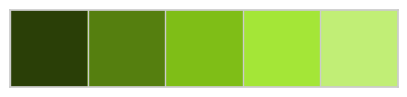

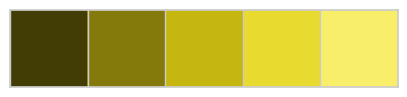

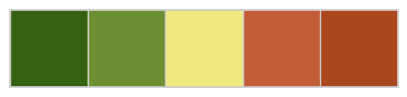

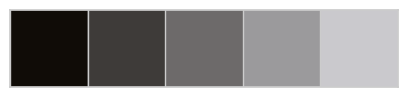

In [2]:
# Create List of Color Palletes 
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# Plot Color Palletes
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [3]:
ds = pd.read_csv('C:\\Users\\sudee\\OneDrive\\Desktop\\python\\avocado.csv')

In [4]:
ds

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
### In the dataset, there are 14 columns with 18249 observations.Also, there are no null values in this dataset.

In [7]:
ds.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
ds.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [9]:
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [10]:
print('.: Imported Dataset Info :')
print('**************************')
print('Total Rows:', ds.shape[0])
print('Total Columns:', ds.shape[1])
print('**************************')
print('\n')

#  Print Dataset Detail [info]
print('.: Dataset Details :.')
print('**************************')
ds.info(memory_usage = False)

.: Imported Dataset Info :
**************************
Total Rows: 18249
Total Columns: 14
**************************


.: Dataset Details :.
**************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), objec

**************************************
.: Total Avocado based on each Type :.
**************************************


conventional    9126
organic         9123
Name: type, dtype: int64

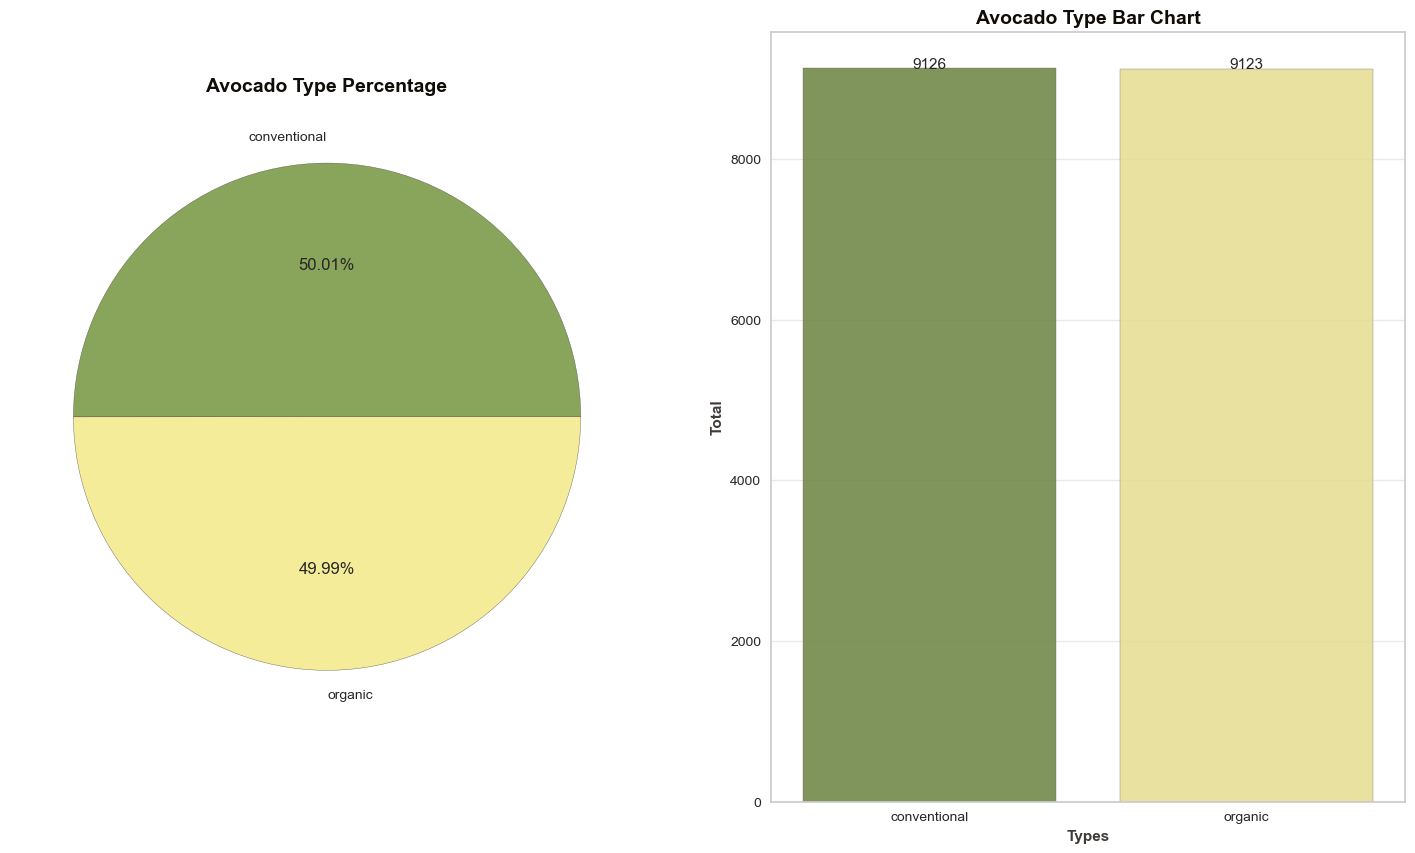

In [11]:
#Colors and Labels (Null Values Dropped) 
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

#Size for Both Figures
plt.figure(figsize=(18, 10))

#Pie Chart
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

#Bar Chart
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

#Count Categorical Labels w/out Dropping Null Walues
print('**************************************')
print('.: Total Avocado based on each Type :.')
print('**************************************')
ds.type.value_counts(dropna=False)

**************************************
.: Total Avocado based on Year :.
**************************************


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

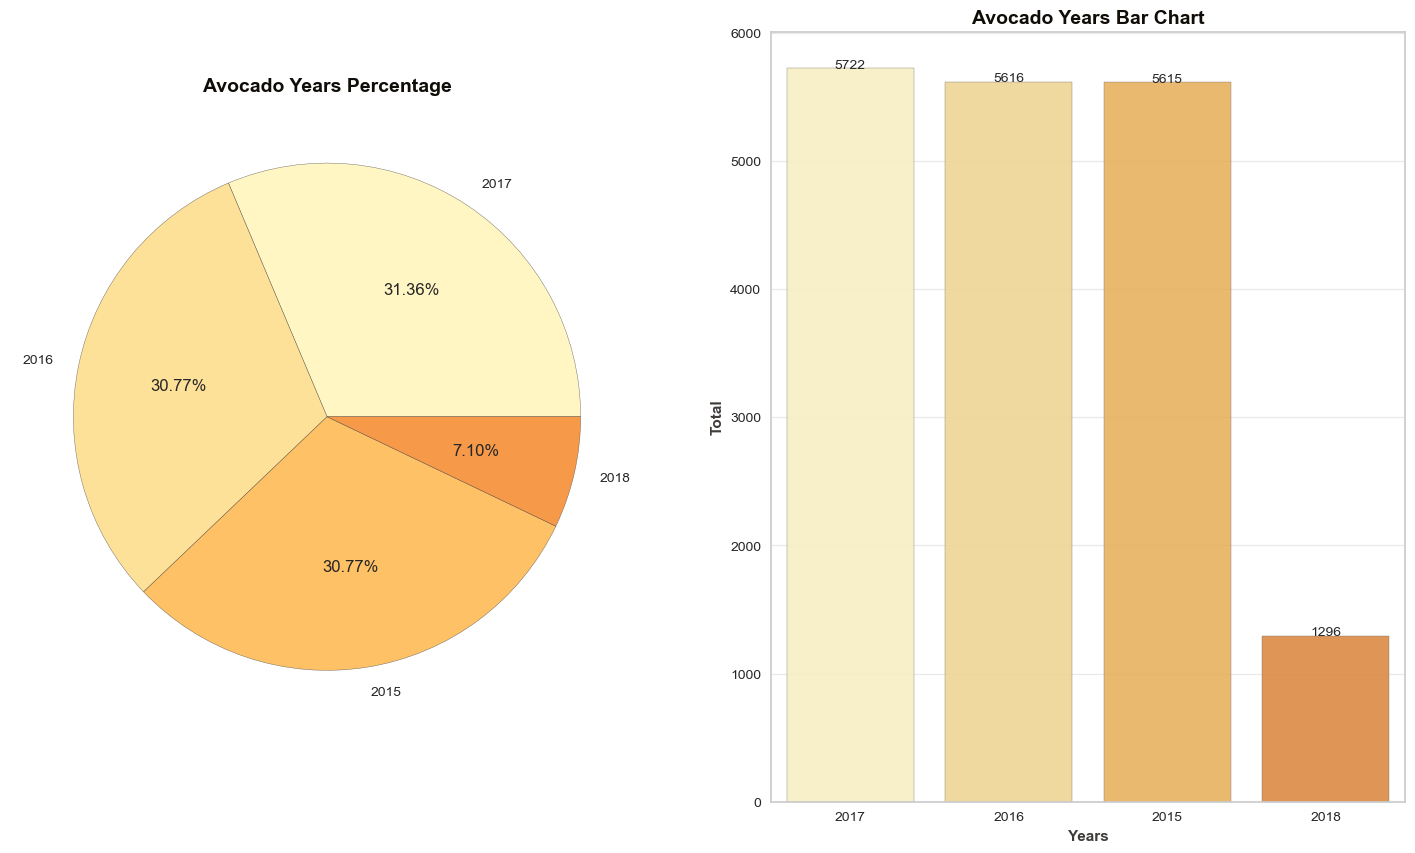

In [12]:
#Colors and Labels (Null Values Dropped)
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

#Size for Both Figures
plt.figure(figsize=(18,10))

#Pie Chart 
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

#Bar Chart
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

#Count Categorical Labels w/out Dropping Null Walues
print('**************************************')
print('.: Total Avocado based on Year :.')
print('**************************************')
ds.year.value_counts(dropna=False)

In [13]:
print('.: Total Avocado based on Regions :.')
ds.region.value_counts(dropna=False)

.: Total Avocado based on Regions :.


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

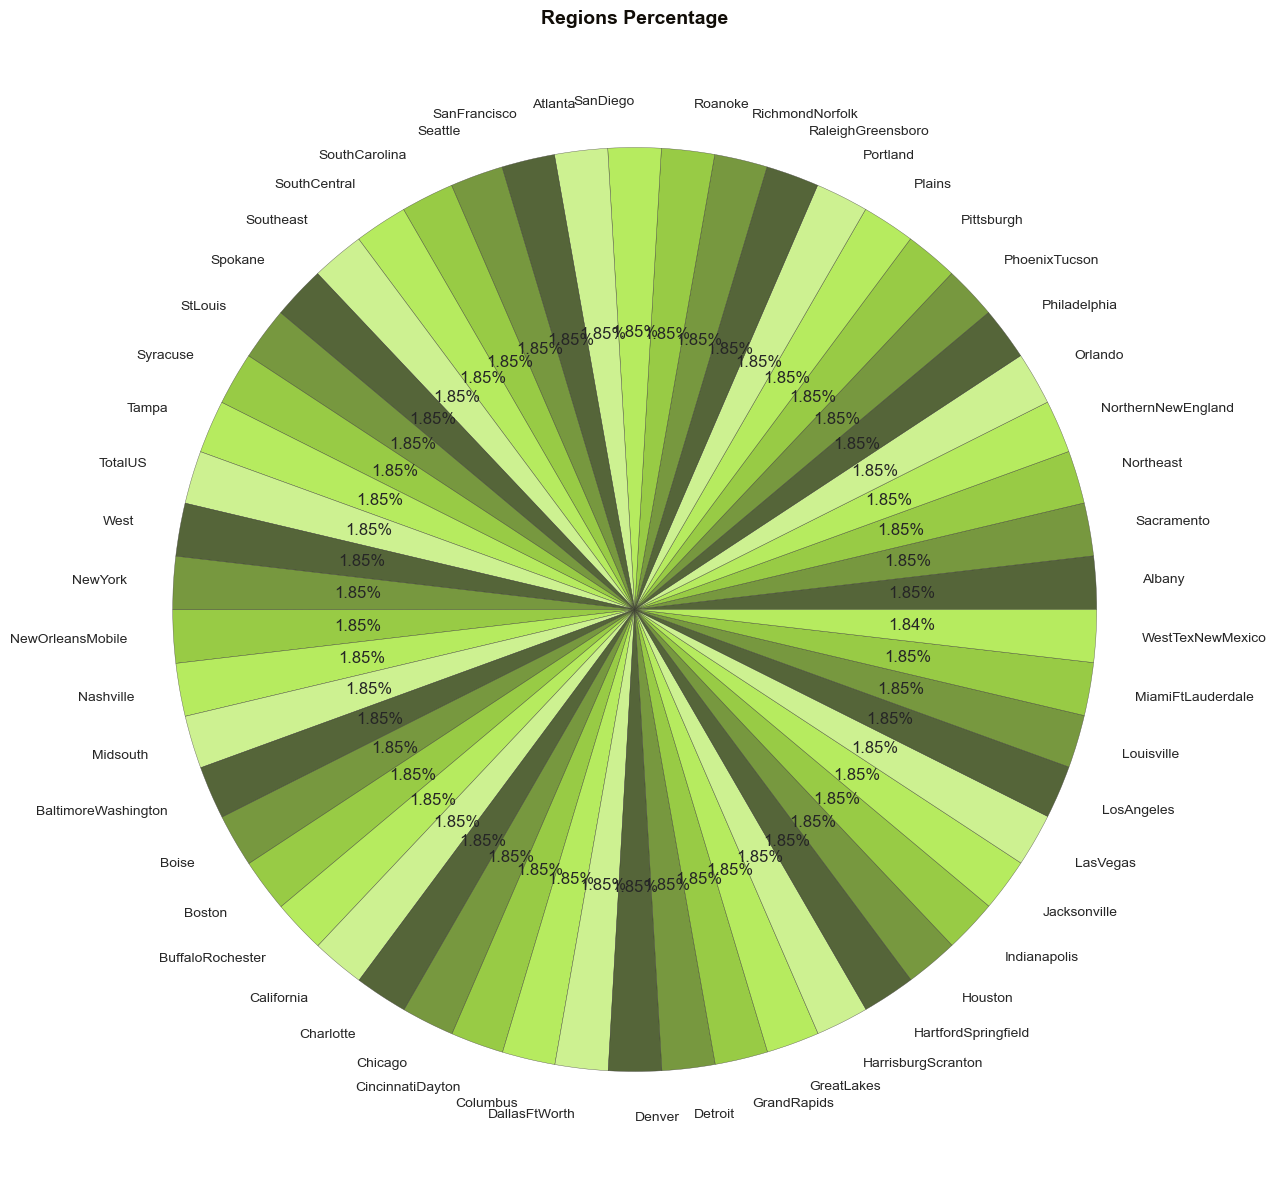

In [14]:
#Colors and Labels (Null Values Dropped)
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index
94
#Pie Chart
plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%');

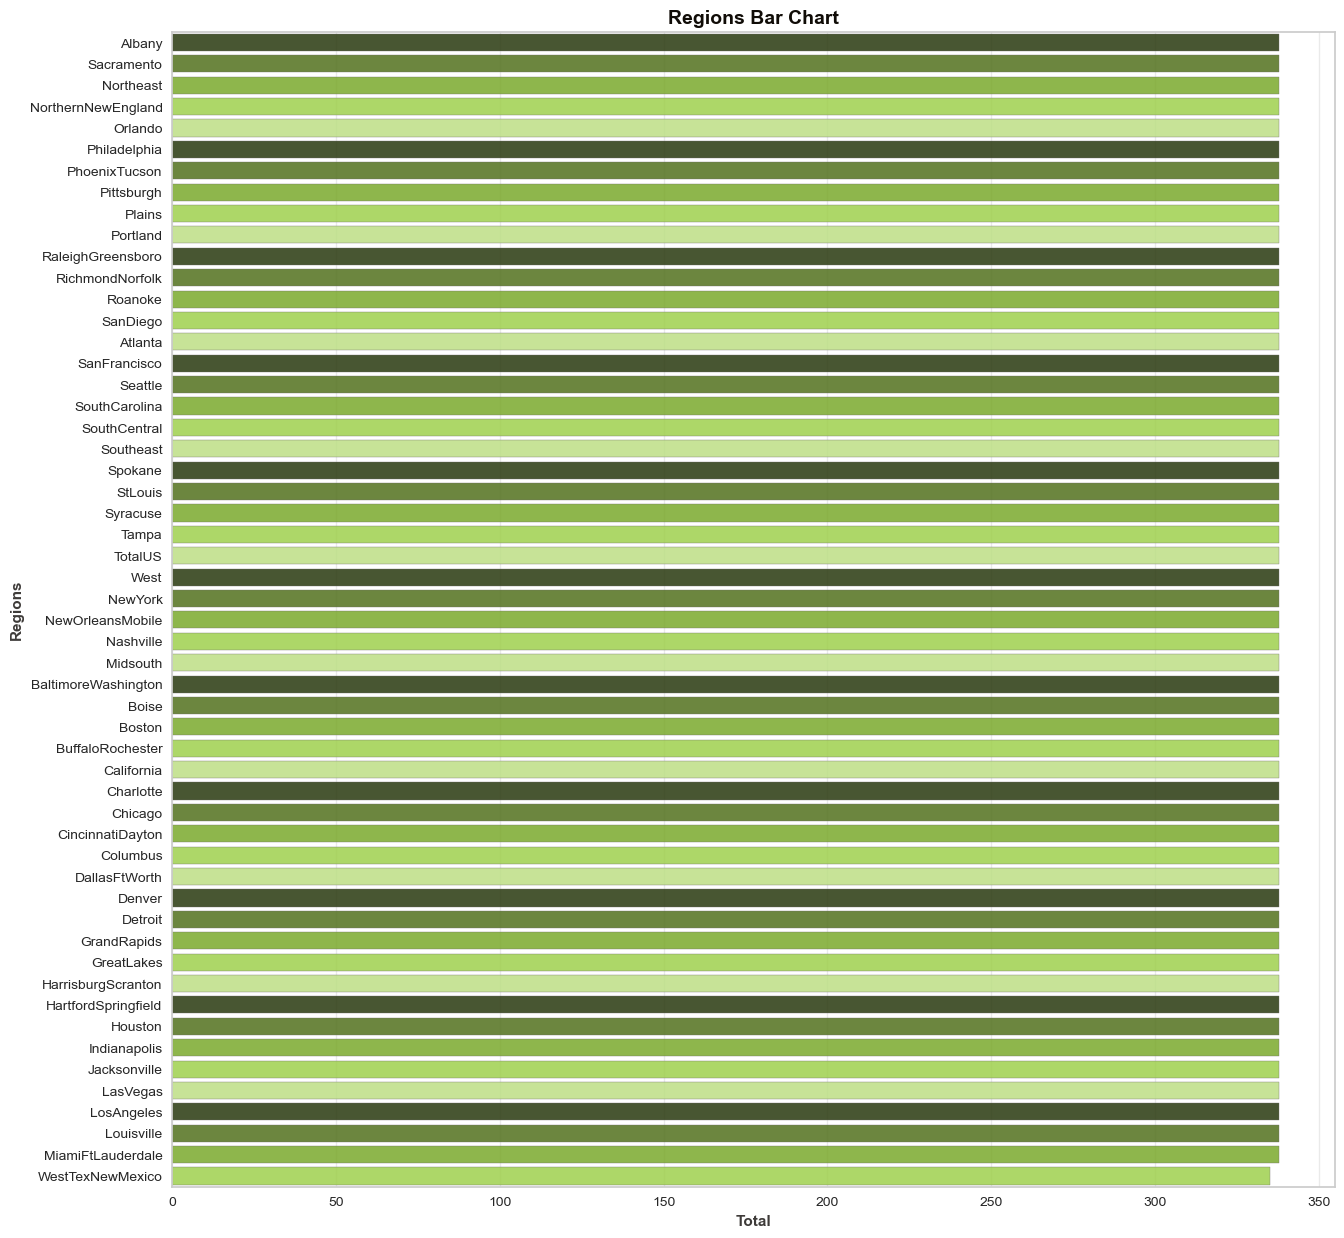

In [15]:
#Bar Chart
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4);

### The number of avocados from various regions are equally distributed (with percentage of 1.85%).However,in westTexNewMexico, the number of avocados slightly lower (335 avocados).

In [16]:
#Descriptive Statistics
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


## From the descriptive statistics, it can be seen that Average Price is lack of variation. Furthermore, it can be seen that the rest of the columns have more variation.

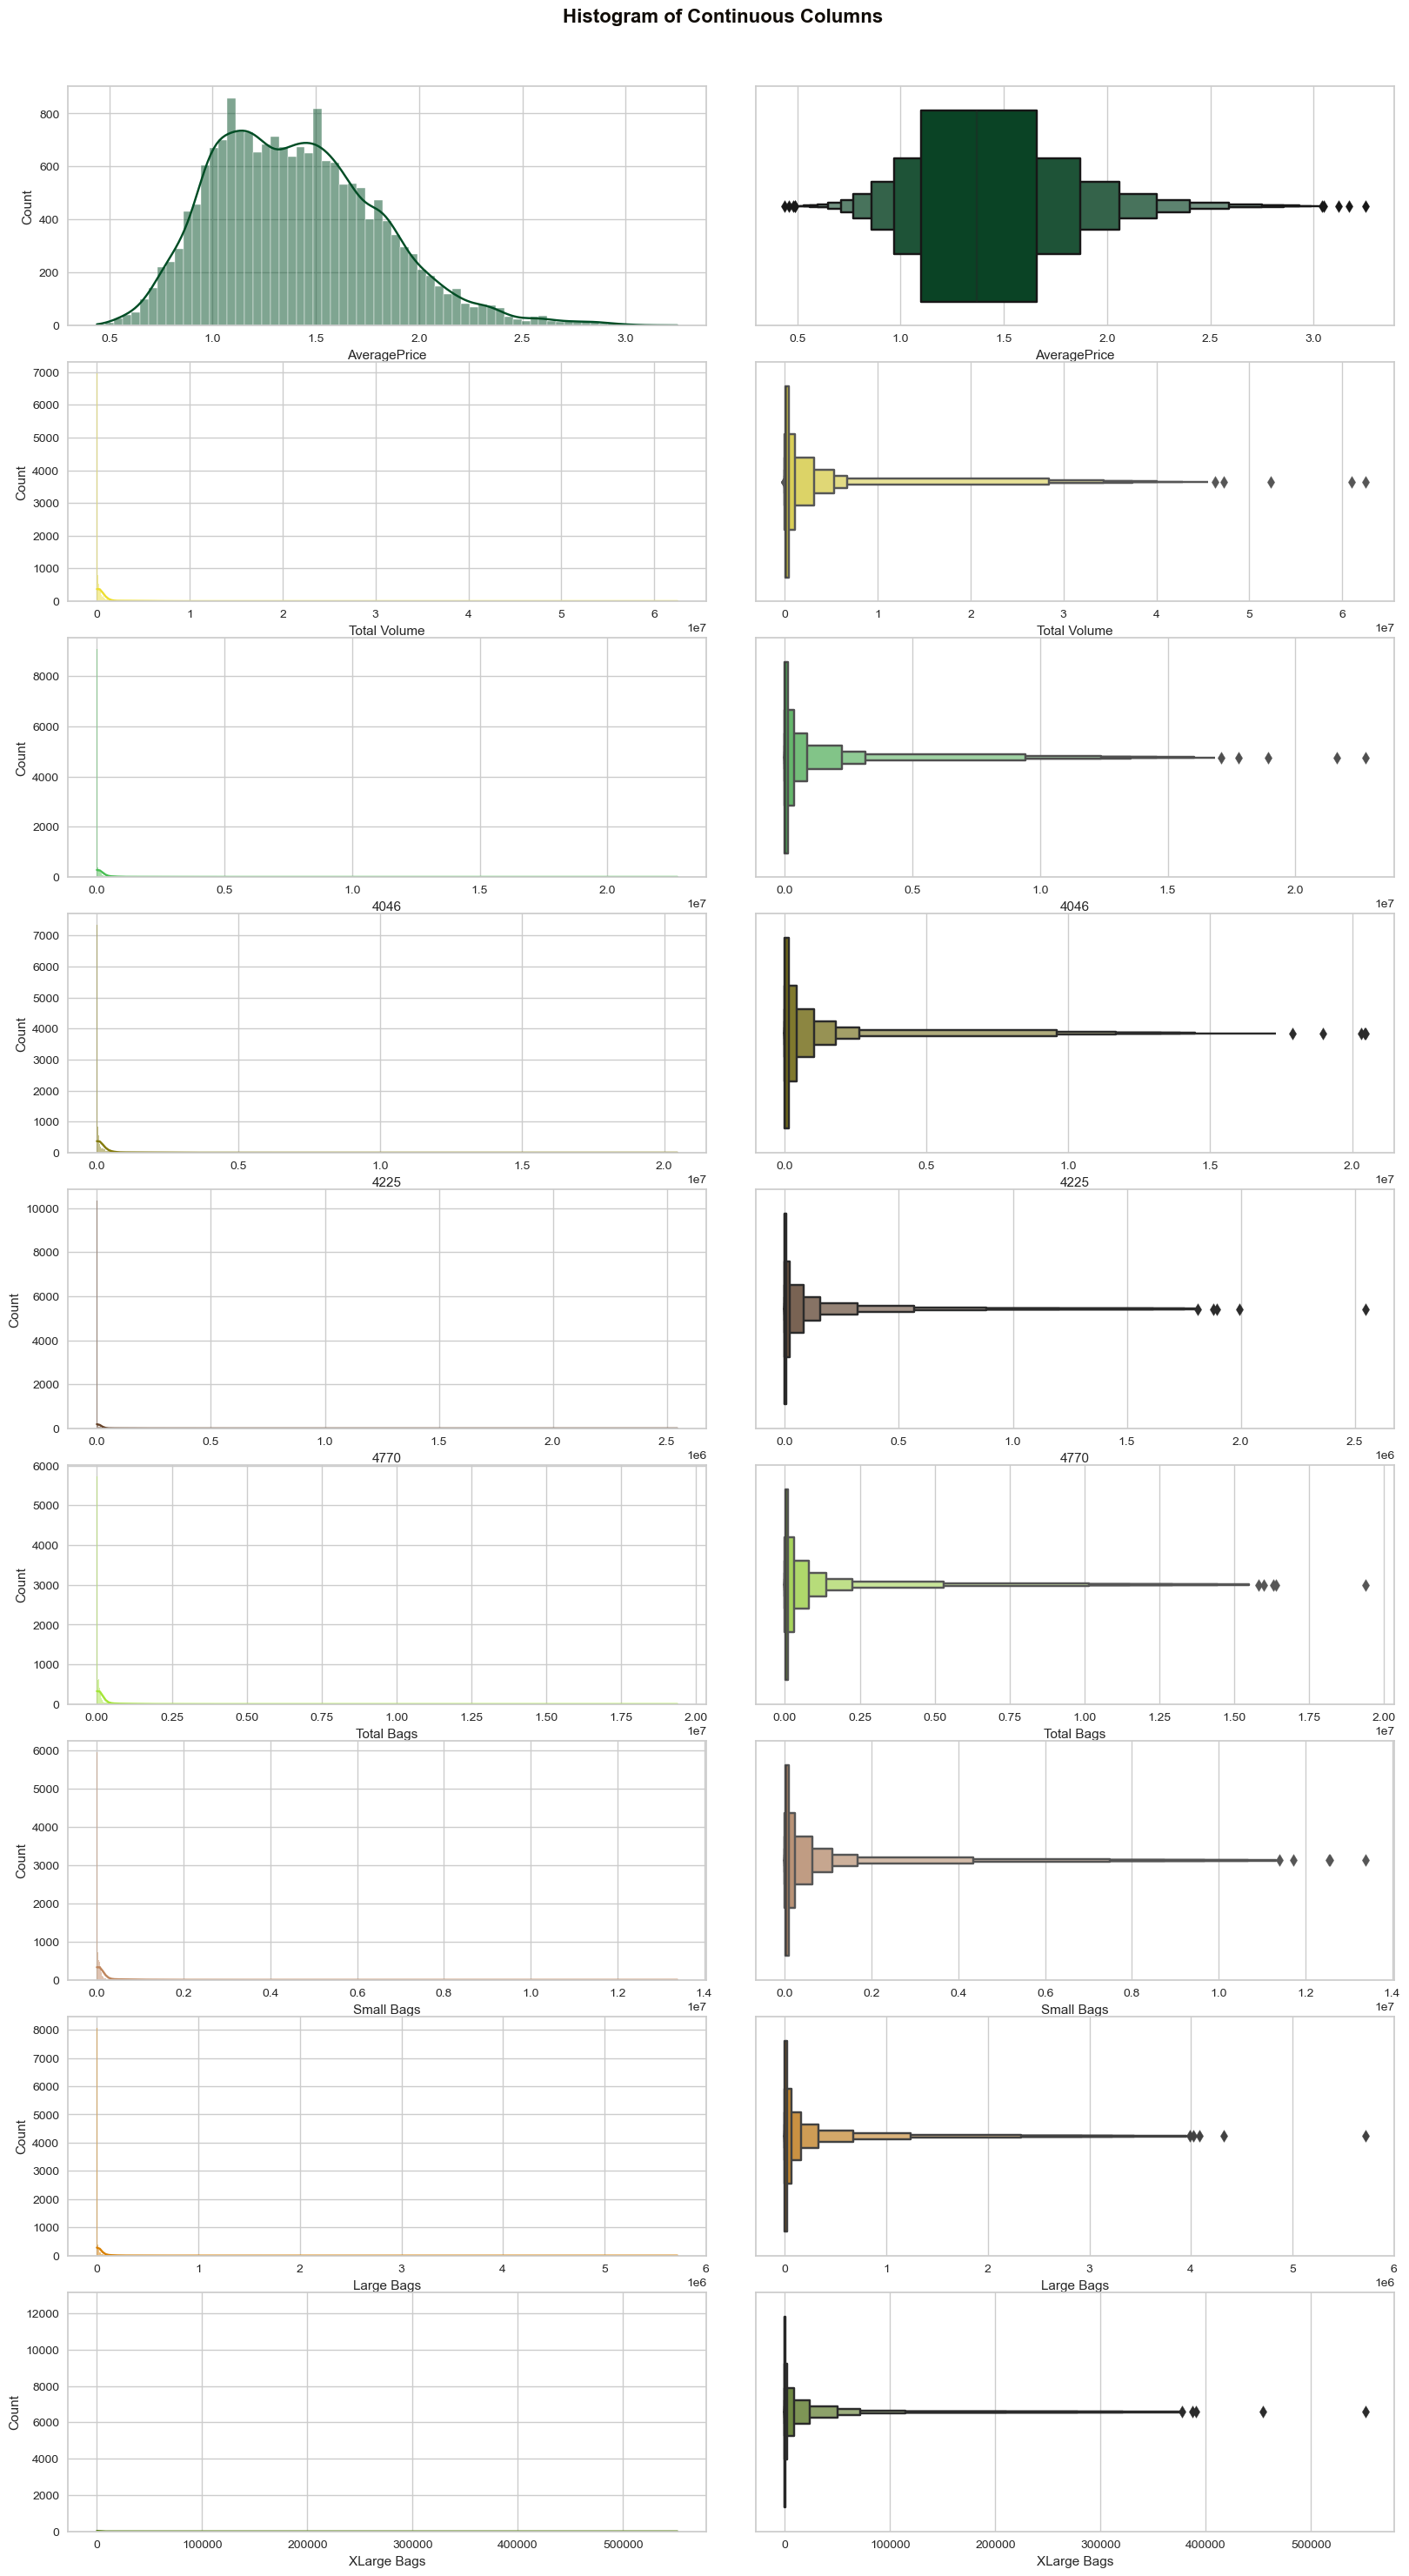

In [17]:
#Plot Size
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# Title
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

#Continuous Variables (Row 1)
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

#Continuous Variables (Row 2)
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')

#Continuous Variables (Row 3)
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

#Continuous Variables (Row 4)
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

#Continuous Variables (Row 5)
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

#Continuous Variables (Row 6)
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

#Continuous Variables (Row 7)
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

#Continuous Variables (Row 8)
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# Continuous Variables (Row 9)
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F');

##  From the boxenplots and histogram, it can be seen that most of the columns has extreme outliers and heavily right-skewed. However, in Average Price column, the distribution is moderately skewed to the right and it has outliers.

In [18]:
#Skewness of Continuous Variables
print('.: Continuous Columns Skewness :.')
print('*********************************')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
*********************************


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

## All columns beside Average Price are highly right skewed

In [19]:
#Kurtoisis of Continuous Variables 
print('.: Continuous Columns Kurtosis :.')
print('*********************************')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
*********************************


AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64

## All columns beside Average Price is leptokurtic. While Average Price itself is platikurtic.

## Eda

### top 5 regions with most sales for each avocado types.

In [20]:
#Create New Dataframes based on Type 
eda0 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'conventional']
eda0 = eda0[eda0['region'] != 'TotalUS']
eda0 = eda0.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume',
                                                                                 ascending = False).iloc[:5]
      

In [21]:
eda1 = ds.xs(['region', 'Total Volume'], axis = 1)[ds.type == 'organic']
eda1 = eda1[eda1['region'] != 'TotalUS']
eda1 = eda1.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume', 
                                                                                 ascending = False).iloc[:5]

In [22]:
fig.suptitle('Top 5 Regions w/ The Most Sales', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

Text(0.5, 0.98, 'Top 5 Regions w/ The Most Sales')

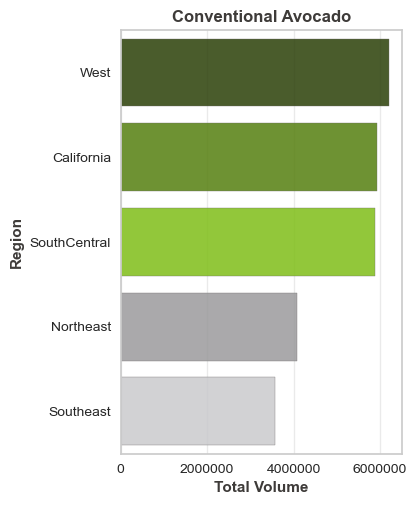

In [23]:
#Bar Chart Left 
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(x='Total Volume', y = eda0.index, data = eda0, palette = black_grad, edgecolor = black_grad[2], 
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')

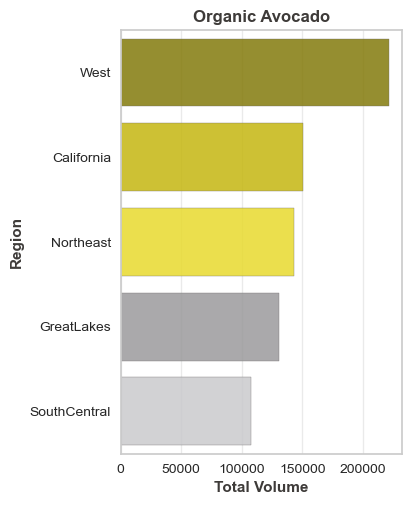

In [24]:
#Bar Chart Right
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(x='Total Volume', y = eda1.index, data = eda1, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show();

### top 5 regions with highest avocado prices for each avocado types.

In [25]:
eda2 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'conventional']
eda2 = eda2.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice', 
                                                                                 ascending = False).iloc[:5]

In [26]:
eda3 = ds.xs(['region', 'AveragePrice'], axis = 1)[ds.type == 'organic']
eda3 = eda3.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

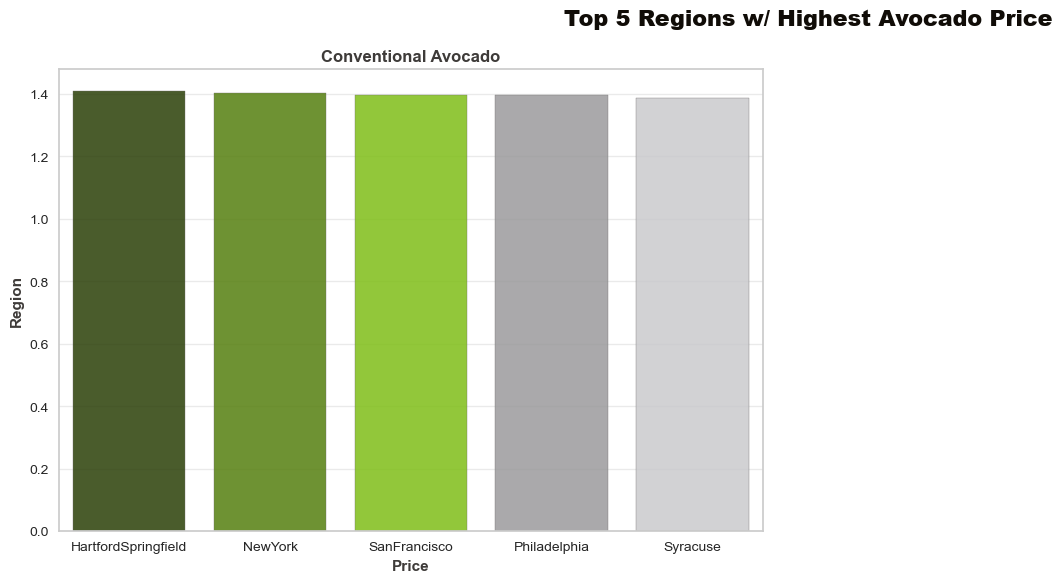

In [27]:
#Bar Chart Left 
fig, ax = plt.subplots(1, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(y = 'AveragePrice', x = eda2.index, data = eda2, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

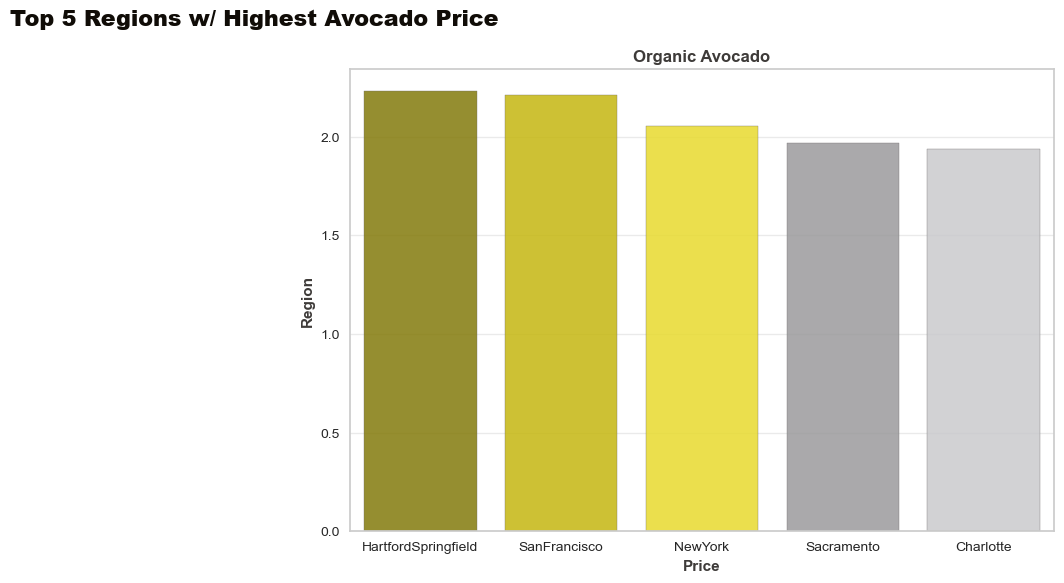

In [28]:
#Bar Chart Right 
fig, ax = plt.subplots(1, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(y='AveragePrice', x = eda3.index, data = eda3, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show();

###  Now lets compare total avocado sold based on PLU

In [29]:
eda30 = ds.xs(['type', '4046', '4225', '4770'], axis = 1)
eda30= eda30.groupby(['type']).aggregate({'4046': np.mean, '4225': np.mean, '4770': np.mean})

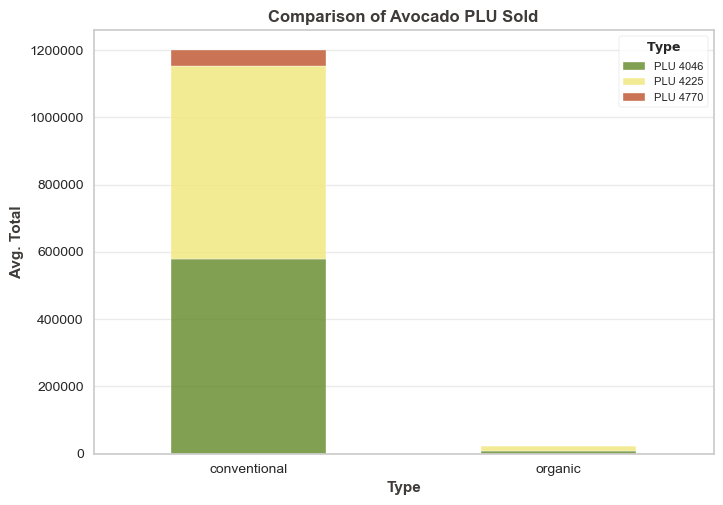

In [30]:
eda30.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', 
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

## Based on stacked bar chart above, it can be seen that conventional avocado with PLU 4046 & PLU 4225 have almost the same quantity of avocado sold. For PLU 4770, the quantity of avocado sold is very small compared to other PLU. In organic type, the avocado with PLU 4225 is the highest, followed by PLU 4046.

###  Now this compare total avocado sold based on bags size

In [31]:
eda31 = ds.xs(['type', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis = 1)
eda31 = eda31.groupby(['type']).aggregate({'Small Bags': np.mean, 'Large Bags': np.mean, 'XLarge Bags': np.mean})

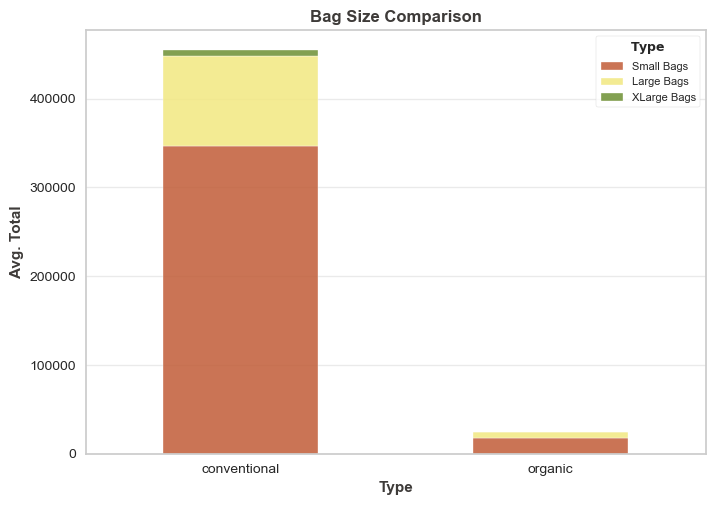

In [32]:
#Stacked Bar Chart 
eda31.plot(kind = 'bar', stacked = True, color = color_mix[3:0:-1], alpha = 0.85)
plt.title('Bag Size Comparison', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Small Bags','Large Bags', 'XLarge Bags'], title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9,
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y');

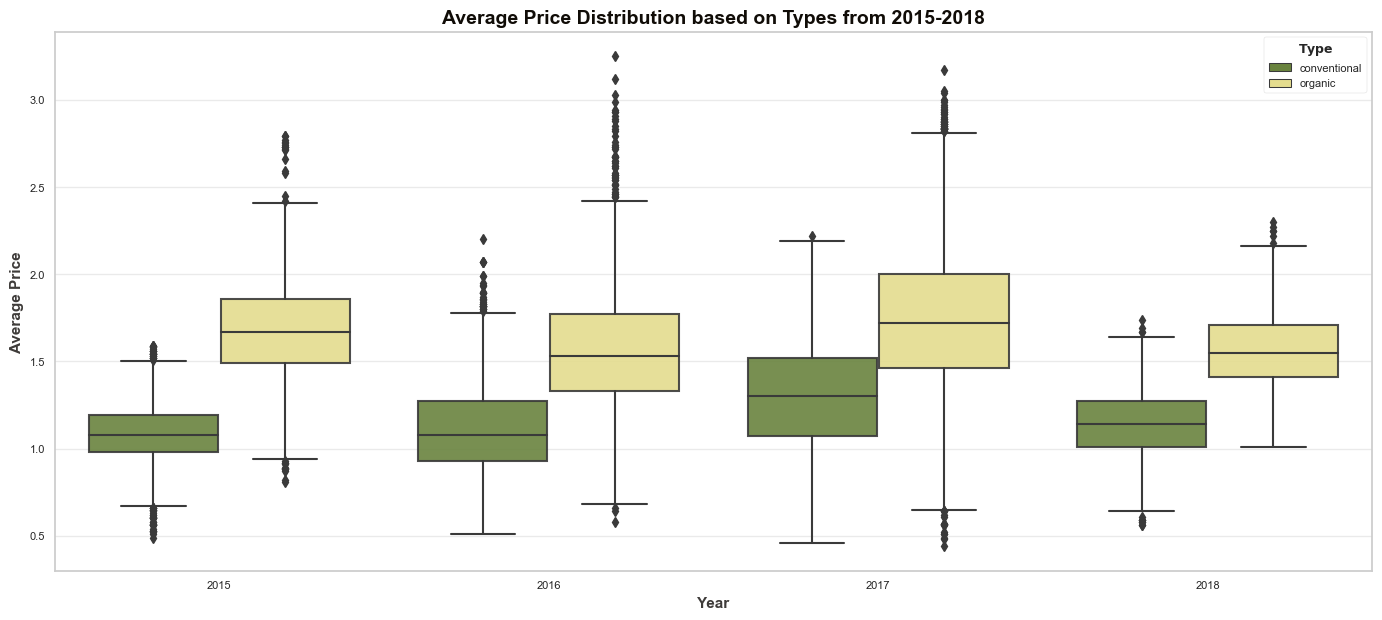

In [33]:
#Creating Box Plot based on Type
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

In [34]:
#Seperating Total Volume & Total Bags based on Type
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

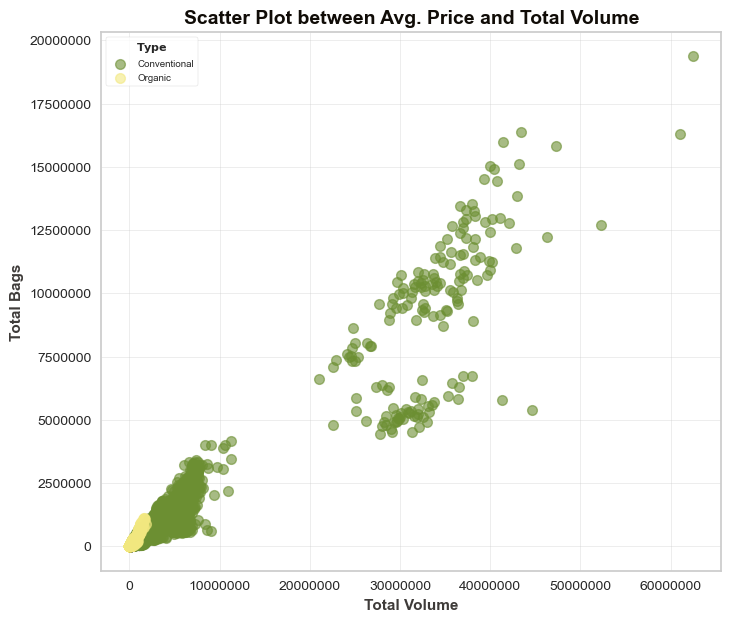

In [35]:
#Creating Scatter Plot 
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

### This shows heteroscedasticity . if the total avocado sold for both types increases, then the total bags also increases.The distribution for organic avocados relatively lower and congregate at the same spot compared to conventional avocados which more spread out.

In [36]:
## Times series plot about total avocado sold from 2015-2018 based on avocado type.

In [37]:
#Calculating Mean of `Total Volume` grouped by Type and Date
dseda8 = ds[['Date', 'Total Volume', 'type']]
dseda8['Date'] = pd.DatetimeIndex(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].apply(lambda x: x.strftime('%Y-%m'))
group8 = dseda8.groupby(['Date', 'type'])
mnth_avg8 = group8.aggregate({'Total Volume': np.mean})

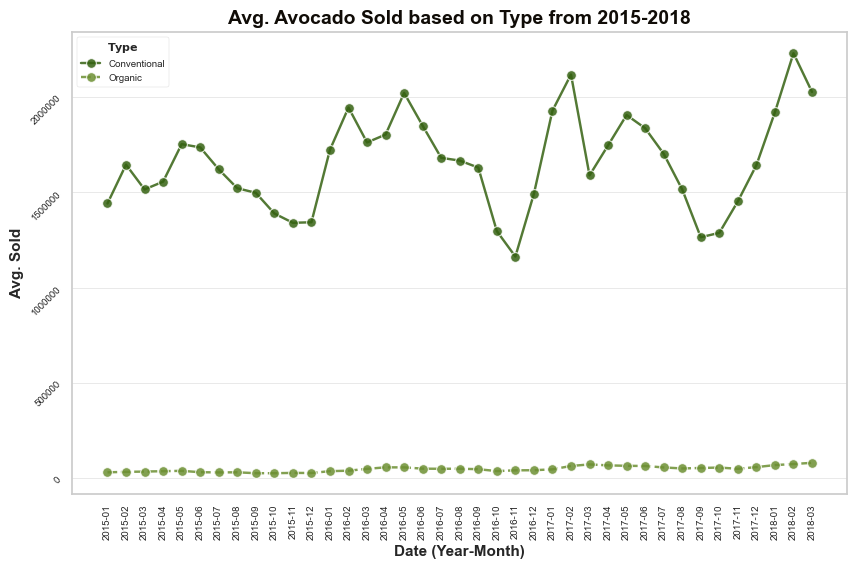

In [38]:
#Creating Time Series Plot of Avg. Price 
plt.figure(figsize = (10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = mnth_avg8, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(rotation = '45', fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True);

### this is for average price time series plot of avocado

In [39]:
#Calculating Mean of `AveragePrice` grouped by Type and Date
dseda9 = ds[['Date', 'AveragePrice', 'type']]
dseda9['Date'] = pd.DatetimeIndex(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].apply(lambda x: x.strftime('%Y-%m'))
group9 = dseda9.groupby(['Date', 'type'])
mnth_avg9 = group9.aggregate({'AveragePrice': np.mean})

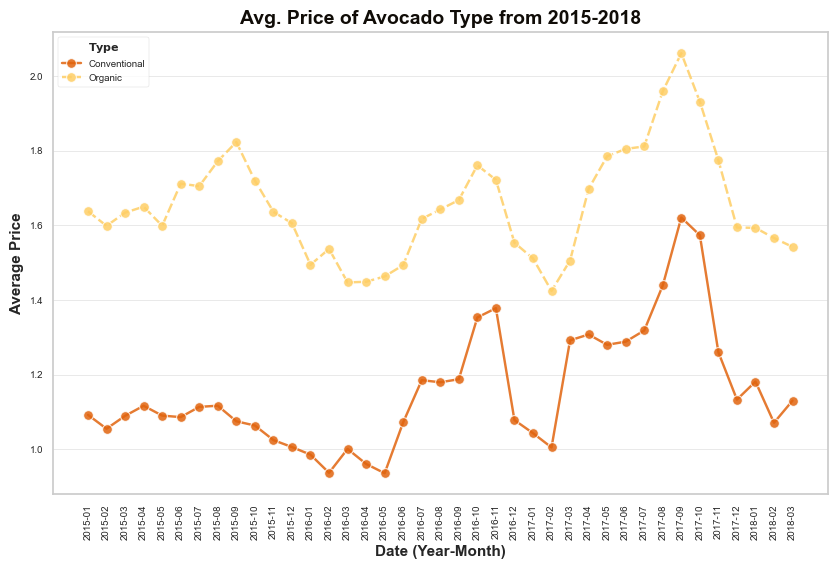

In [40]:
#Creating Time Series Plot of Avg. Price 
plt.figure(figsize = (10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = mnth_avg9, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True);

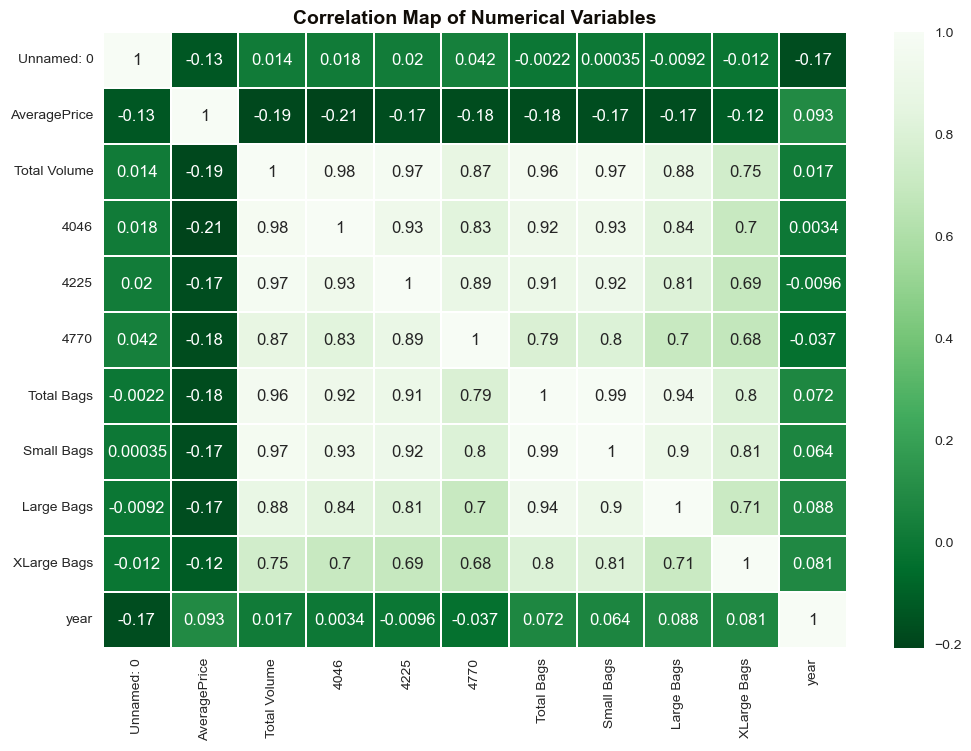

In [41]:
#Correlation Map (Heatmap)
plt.figure(figsize = (12, 8))
sns.heatmap(ds.corr(), annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Correlation Map of Numerical Variables', fontsize = 14, fontweight = 'bold', fontfamily = 'sans-serif',
          color = black_grad[0]);

### Total Volume, 4046, 4225. 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are highly correlated to each other

In [42]:
#Lets Change `Date` Format to 'datetime' 
ds.Date = pd.to_datetime(ds.Date)

#Extracting Month Number from `Date`  
ds['month'] = pd.DatetimeIndex(ds['Date']).month

# #Lets use  PyCaret

In [43]:
#Setup PyCaret Regression Module
avc = setup(data = ds, target = 'AveragePrice', train_size = 0.8,
            categorical_features = ['type', 'year', 'region', 'month'], normalize = True, normalize_method = 'robust', 
            session_id = 123)

,Description,Value
0,Session id,123
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 15)"
4,Transformed data shape,"(18249, 31)"
5,Transformed train set shape,"(14599, 31)"
6,Transformed test set shape,"(3650, 31)"
7,Ordinal features,1
8,Numeric features,11
9,Date features,1


In [44]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### Lets now Compare all the Models

In [45]:
best_models = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0882,0.0167,0.1290,0.8973,0.0503,0.0642,0.1150
lightgbm,Light Gradient Boosting Machine,0.1048,0.0202,0.1420,0.8754,0.0565,0.0767,0.1100
xgboost,Extreme Gradient Boosting,0.1033,0.0208,0.1443,0.8714,0.0561,0.0740,0.0330
rf,Random Forest Regressor,0.0991,0.0212,0.1456,0.8691,0.0561,0.0712,0.0880
gbr,Gradient Boosting Regressor,0.1411,0.0357,0.1887,0.7799,0.0755,0.1045,0.0290
dt,Decision Tree Regressor,0.1353,0.0408,0.2019,0.7482,0.0789,0.0967,0.0280
knn,K Neighbors Regressor,0.1565,0.0469,0.2163,0.7108,0.0863,0.1155,0.1590
ada,AdaBoost Regressor,0.1839,0.0531,0.2303,0.6722,0.0957,0.1454,0.0290
lar,Least Angle Regression,0.1822,0.0583,0.2413,0.6401,0.0975,0.1373,0.0280
br,Bayesian Ridge,0.1822,0.0583,0.2413,0.6401,0.0975,0.1373,0.0270


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

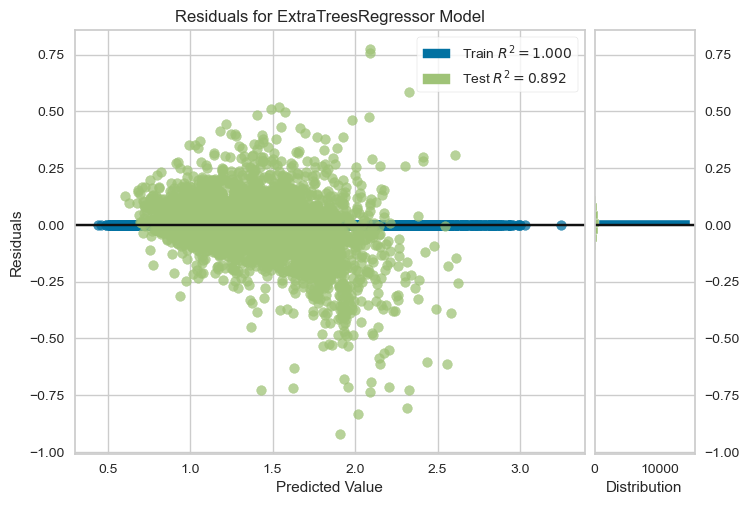

In [46]:
plot_model(best_models)

###  From the plot, it can be seen that the test set is randomly dispersed around horizontal axis, which indicates good fit of model. It also can be seen that the best model can achieve 1.000 R2 score in train set.This means that there is no overfitting/underfitting happened which indicates very good performance.

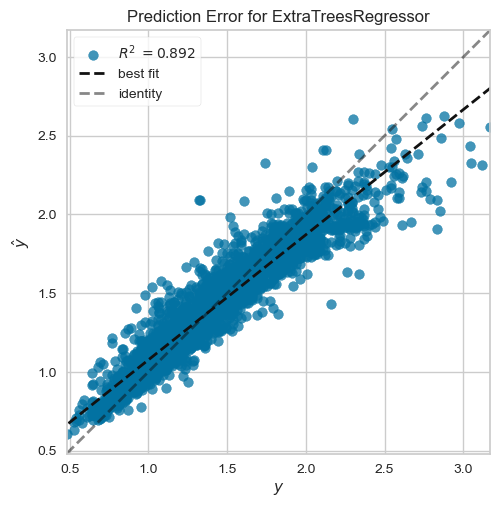

In [47]:
plot_model(best_models, plot = 'error')

###  From the error plot, it can be seen that there a little gap between the best fit line (predicted values) against the identity line (actual targets). This means that the accuracy of extra tree regressor is very good for prediction.

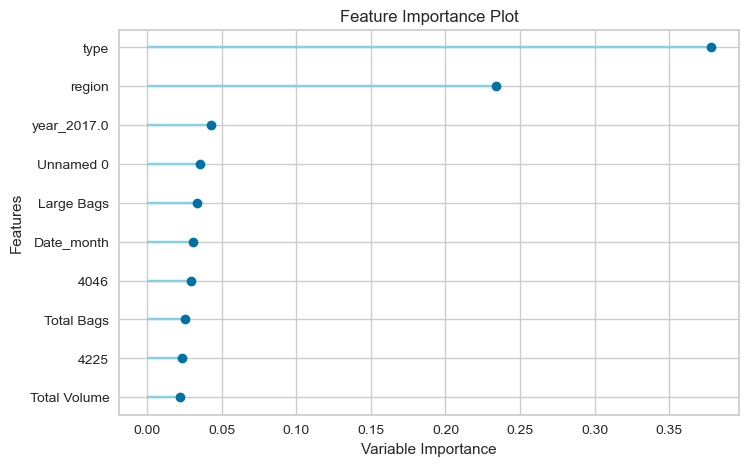

In [48]:
plot_model(best_models, plot = 'feature')

In [49]:
tuned_best = tune_model(best_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1934,0.0672,0.2592,0.5988,0.1030,0.1463
1,0.2008,0.0692,0.2631,0.5992,0.1053,0.1517
2,0.1886,0.0598,0.2446,0.6032,0.1021,0.1505
3,0.1917,0.0661,0.2571,0.5982,0.1034,0.1472
4,0.1964,0.0659,0.2567,0.5975,0.1037,0.1506
5,0.1880,0.0608,0.2467,0.5983,0.1017,0.1483
6,0.1944,0.0652,0.2554,0.5929,0.1048,0.1528
7,0.1983,0.0738,0.2717,0.5650,0.1072,0.1477
8,0.1972,0.0679,0.2607,0.5693,0.1066,0.1538


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


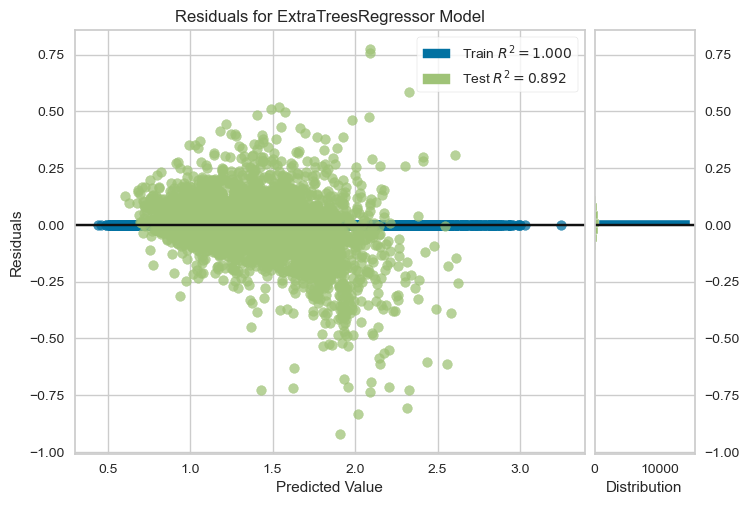

In [50]:
plot_model(tuned_best)

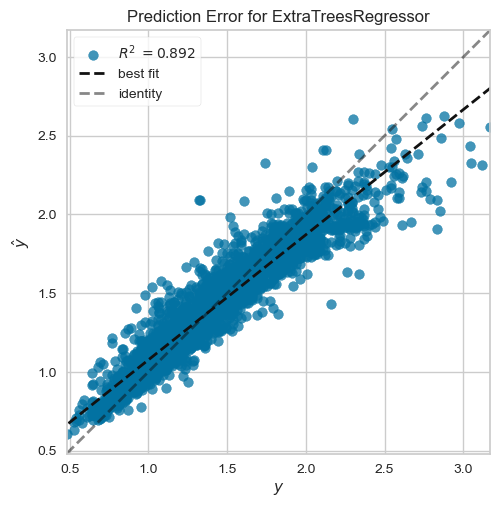

In [51]:
plot_model(tuned_best, plot = 'error')

###  Now lets create the Random Forest regressor model 

In [52]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1005,0.0231,0.1519,0.8622,0.0571,0.0708
1,0.1058,0.0237,0.1539,0.8628,0.0587,0.0741
2,0.0937,0.0182,0.1351,0.8790,0.0535,0.0693
3,0.1011,0.0236,0.1537,0.8564,0.0582,0.0714
4,0.0975,0.0205,0.1432,0.8747,0.0542,0.0691
5,0.0936,0.0190,0.1379,0.8745,0.0533,0.0678
6,0.0961,0.0193,0.1390,0.8795,0.0545,0.0704
7,0.1012,0.0223,0.1494,0.8685,0.0568,0.0715
8,0.0992,0.0201,0.1416,0.8729,0.0557,0.0725


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

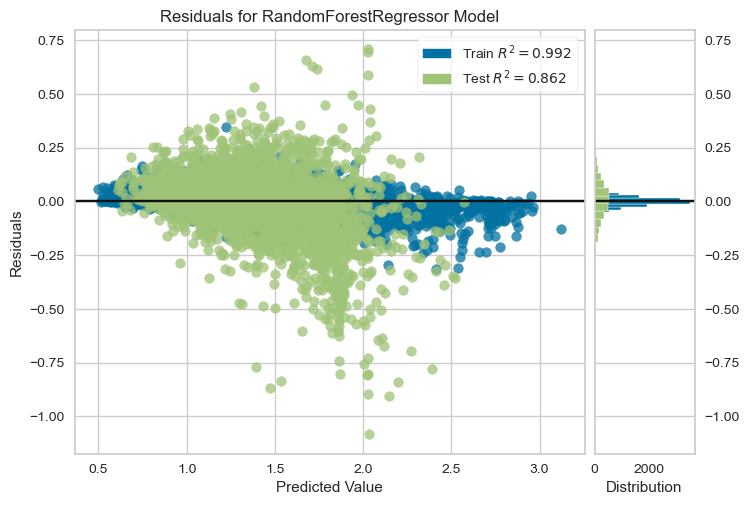

In [53]:
plot_model(rf)

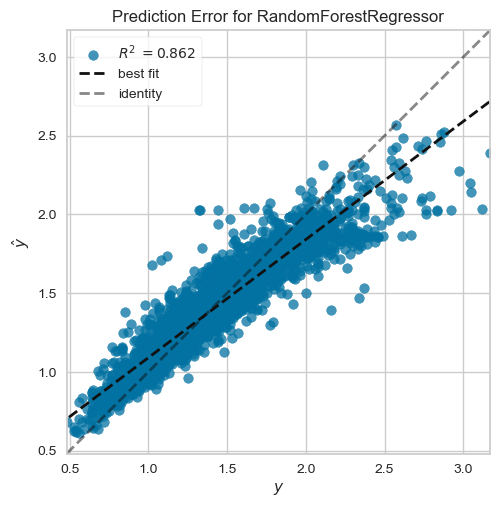

In [54]:
plot_model(rf, plot = 'error')

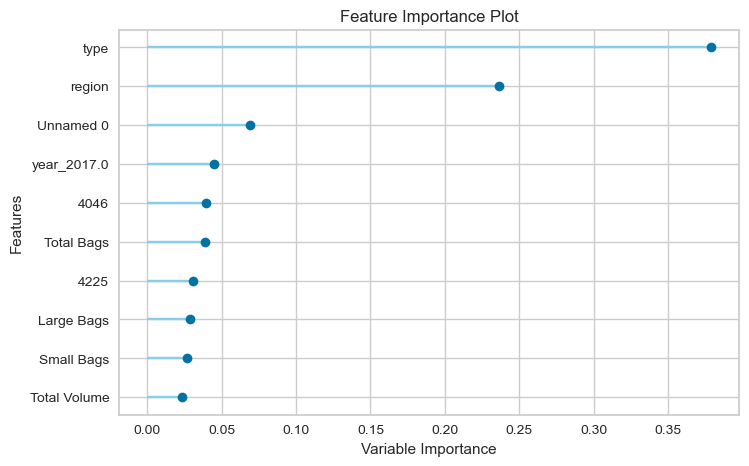

In [55]:
plot_model(rf, plot = 'feature')

###  tuning for Random Forest regressor 

In [56]:
tune_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1542,0.0436,0.2088,0.7396,0.0823,0.1138
1,0.1587,0.0432,0.2078,0.7498,0.0827,0.1174
2,0.1542,0.0395,0.1987,0.7381,0.0823,0.1194
3,0.1485,0.0402,0.2004,0.7559,0.0798,0.1112
4,0.1543,0.0405,0.2012,0.7528,0.0808,0.1158
5,0.1532,0.0404,0.2010,0.7333,0.0818,0.1168
6,0.1582,0.0438,0.2093,0.7267,0.0849,0.1208
7,0.1597,0.0481,0.2193,0.7166,0.0858,0.1163
8,0.1616,0.0448,0.2116,0.7162,0.0859,0.1227


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


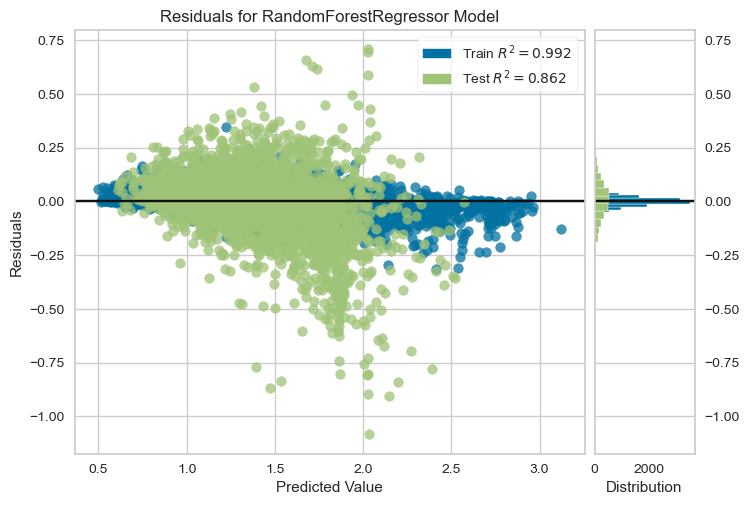

In [57]:
plot_model(tune_rf)

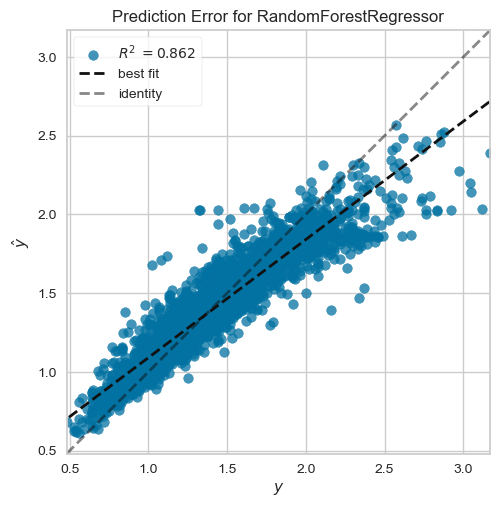

In [58]:
plot_model(tune_rf, plot = 'error')

### Now lets create the light gradient boosting model

In [59]:
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1030,0.0201,0.1418,0.8798,0.0555,0.0742
1,0.1075,0.0198,0.1409,0.8850,0.0560,0.0776
2,0.1038,0.0191,0.1381,0.8735,0.0566,0.0784
3,0.1035,0.0207,0.1437,0.8744,0.0560,0.0744
4,0.1012,0.0183,0.1351,0.8885,0.0530,0.0730
5,0.0998,0.0181,0.1344,0.8807,0.0541,0.0736
6,0.1062,0.0209,0.1446,0.8696,0.0577,0.0781
7,0.1095,0.0230,0.1516,0.8646,0.0593,0.0785
8,0.1059,0.0200,0.1416,0.8729,0.0571,0.0783


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

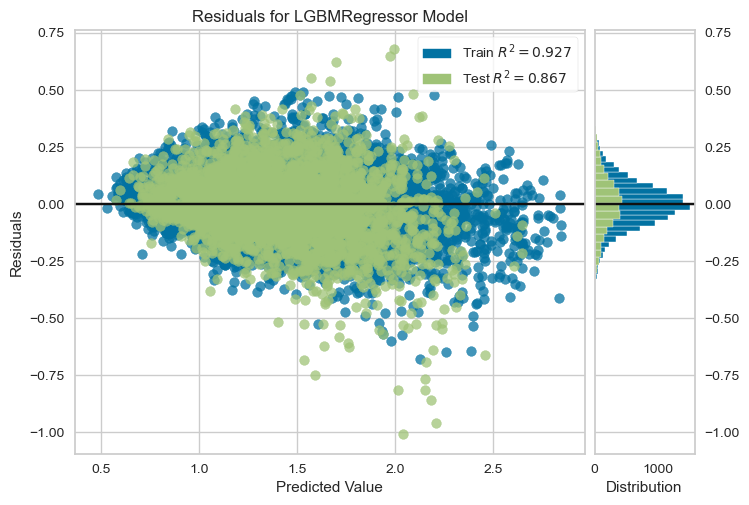

In [60]:
plot_model(lgbm)

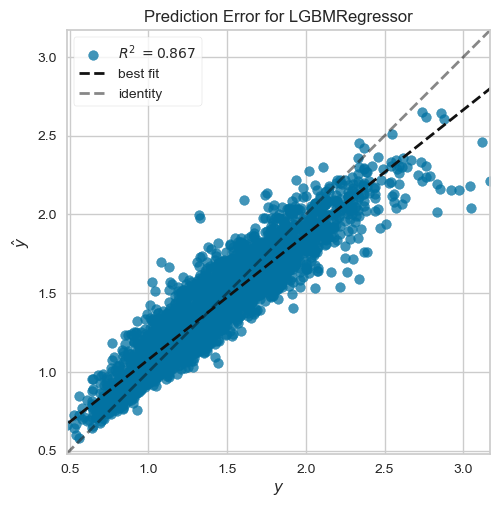

In [61]:
plot_model(lgbm, plot = 'error')

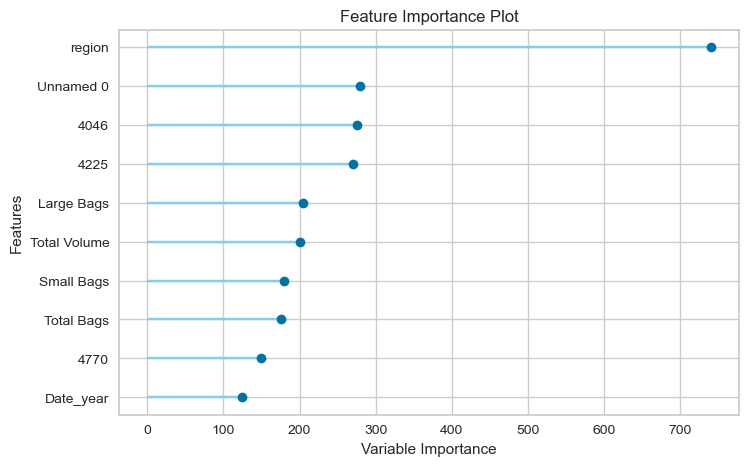

In [62]:
plot_model(lgbm, plot = 'feature')

###  tuning for light gradient boosting 

In [63]:
tune_lgbm = tune_model(lgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1258,0.0301,0.1736,0.8201,0.0680,0.0912
1,0.1319,0.0302,0.1738,0.8251,0.0688,0.0960
2,0.1246,0.0267,0.1634,0.8229,0.0676,0.0955
3,0.1252,0.0293,0.1710,0.8222,0.0673,0.0917
4,0.1239,0.0273,0.1652,0.8332,0.0657,0.0912
5,0.1228,0.0270,0.1642,0.8220,0.0663,0.0918
6,0.1287,0.0297,0.1724,0.8146,0.0695,0.0963
7,0.1325,0.0339,0.1840,0.8004,0.0720,0.0957
8,0.1326,0.0308,0.1756,0.8046,0.0713,0.1000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


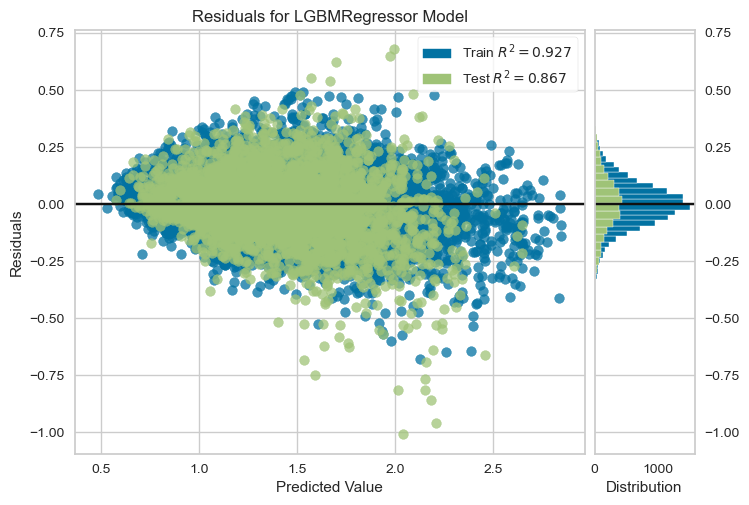

In [64]:
plot_model(tune_lgbm)

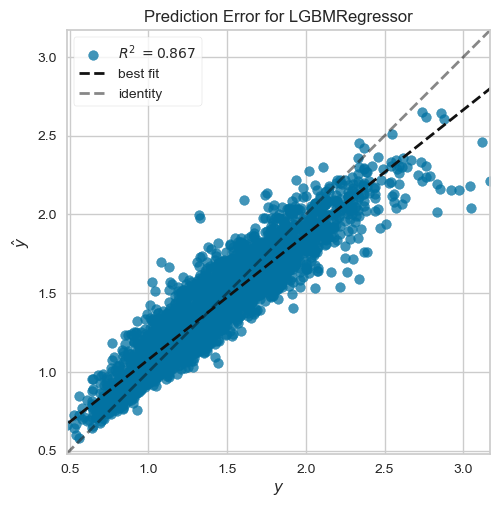

In [65]:
plot_model(tune_lgbm, plot = 'error')

In [66]:
predict_model(best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0894,0.0176,0.1325,0.8915,0.0510,0.0642


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
14599,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8627
14600,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.5969
14601,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.5315
14602,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0382
14603,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.4032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9557
18245,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.1157
18246,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.0893
18247,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.2736


In [67]:
predict_model(rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.1007,0.0223,0.1493,0.8623,0.0567,0.0715


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
14599,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8597
14600,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.5681
14601,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.4556
14602,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0623
14603,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9882
18245,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.0909
18246,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.1775
18247,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.2899


In [68]:
##Prediction using Light Gradient Boosting Mode

In [69]:
predict_model(lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.1074,0.0216,0.1470,0.8666,0.0578,0.0779


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
14599,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.906041
14600,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.501538
14601,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.473772
14602,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.054752
14603,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.254017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.964006
18245,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.057617
18246,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.180435
18247,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.397399


##  Finalize Model

In [70]:
# Finalize Best Model
final_best = finalize_model(best_models)

# Final Best Model Parameters for Deployment
plot_model(best_models, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


In [72]:
predict_model(best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0894,0.0176,0.1325,0.8915,0.0510,0.0642


,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,AveragePrice,prediction_label
14599,34,2016-05-01,8.580374e+05,9.113613e+04,2.710051e+05,11463.750000,484432.531250,458041.093750,25900.730469,490.709991,conventional,2016,Seattle,5,0.82,0.8627
14600,11,2015-10-11,8.749600e+03,6.000000e+00,6.835000e+01,0.000000,8675.250000,8675.250000,0.000000,0.000000,organic,2015,NorthernNewEngland,10,1.61,1.5969
14601,33,2017-05-14,1.437912e+05,3.379520e+03,7.303243e+04,0.000000,67379.257812,29130.710938,38248.550781,0.000000,organic,2017,GreatLakes,5,1.68,1.5315
14602,25,2015-07-05,2.875719e+05,9.488031e+04,1.180226e+05,15212.240234,59456.820312,58905.710938,551.109985,0.000000,conventional,2015,RichmondNorfolk,7,1.01,1.0382
14603,32,2017-05-21,8.759490e+03,7.682000e+01,1.259860e+03,0.000000,7422.810059,2038.260010,5384.549805,0.000000,organic,2017,Indianapolis,5,0.92,1.4032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,51,2016-01-03,4.065584e+06,6.046972e+05,2.200075e+06,543717.875000,717093.500000,438279.968750,147920.687500,130892.796875,conventional,2016,GreatLakes,1,0.92,0.9557
18245,14,2015-09-20,4.759791e+06,1.702966e+06,2.230694e+06,273922.375000,552209.750000,529779.375000,17303.910156,5126.490234,conventional,2015,California,9,1.14,1.1157
18246,51,2017-01-08,1.044249e+05,2.621250e+04,6.181320e+03,0.000000,72031.062500,69782.273438,2248.790039,0.000000,organic,2017,SouthCentral,1,1.10,1.0893
18247,21,2016-07-31,1.153139e+05,1.465426e+04,2.827826e+04,1.600000,72379.726562,70166.726562,2213.000000,0.000000,organic,2016,LosAngeles,7,1.21,1.2736


In [73]:
save_model(final_best,'Final_Best_Model_02-04-2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\sudee\AppData\Local\Temp\joblib),
          steps=[('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('date_feature_extractor',
                  TransformerWrapper(include=['Date'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Unnamed: 0', 'Total Volume',
                                              '4046', '4225',...
                                     transformer=OneHotEncoder(cols=['year',
                                                                     'month'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['region'],
                          